# Performing financial analytics on time series
In  this section, we will visualize some statistical properties of time series data used in financial analytics


# Plotting returns
A simple method for calculating returns in pandas is pct_change;
where the percentage change from the previous row is computed for
every row in the DataFrame.

In this example, we use ABN stock data to plot a simple graph of daily percentage returns:

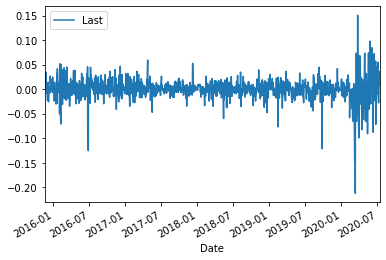

In [9]:
%matplotlib inline
import quandl

QUANDL_API_KEY = '54oxqVQ7BxSJHyGeFd6s'
quandl.ApiConfig.api_key = QUANDL_API_KEY

df = quandl.get('EURONEXT/ABN.4')
# .4 is used to specify the retrieval of only the fourth column of the dataseet
# which contains the last prices

daily_changes = df.pct_change(periods = 1)
daily_changes.plot()

# Plotting cumulative returns
The cumsum method of pandas returns the cumulative sum over a DataFrame
In this Example, we plot the cumulative sum of daily_changes of the ABN calculated previously:

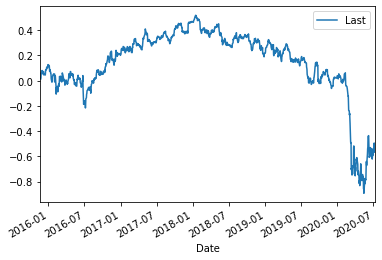

In [3]:
df_cumsum = daily_changes.cumsum()
df_cumsum.plot()

# Plotting a histogram
Histograms tell us how distributed the data is.
In this example, we are interested in how distributed the daily returns of ABN are.
We use the hist() method on a DataFrame with a bin size of 50:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B0950B5288>]],
      dtype=object)

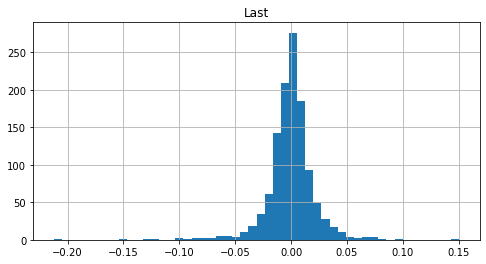

In [4]:
daily_changes.hist(bins= 50, figsize= (8,4))

In [5]:
# we can use the describe() method to summarize the central tendency, dispersion, and shape of a dataset's distribution:

daily_changes.describe()

,Last
count,1180.000000
mean,-0.000449
std,0.021909
min,-0.212453
25%,-0.009185
50%,0.000270
75%,0.009178
max,0.150552


# Analysis:
From the histogram, the returns tend to be distributed about the mean of 0.0
, or 0.000467 to be exact. Besides this miniscule skew to the right, the data appears
fairly symmetrical and normally distributed.

The standard deviation is 0.021836. The percentile tell us that 25% of
the points fall below 0.009147, 50% below 0.000274 and 75% below 0.009149.

# Plotting volatility

One way of analyzing the distribution of returns is measuring its standard deviation.
Standard deviation is a measure of dispersion around the mean. A high standard deviation
value for past returns indicates a high historical volatility(instability) of stock price movement.

The rolling() function of pandas helps us to visualize specific time series operations over a period of time.
To calculate standard deviations of the percentage change of returns in our computed ABN dataset, we use the std() method,
which returns a DataFrame or Series Object that can be used to plot a chart.
The following example illustrates this:

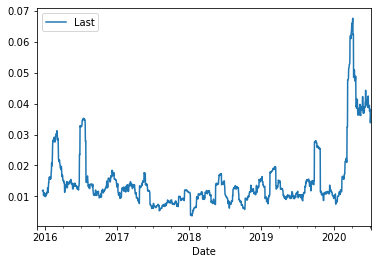

In [6]:
df_filled = df.asfreq('D',method='ffill')
df_returns = df_filled.pct_change()
df_std = df_returns.rolling(window = 30, min_periods = 30).std()
df_std.plot()

# A quantile-quantile plot
A Q-Q (Quantile-Quantile) plot is a probability distribution plot, where the quantiles of two distributions
are plotted against each other. If the distributions are linearly related, the points in the Q-Q plot will lie along a line.

Compared to historgrams, Q-Q plots help us visualize points that lie outside the line for positive and negative skews, as well as excess in kurtosis.

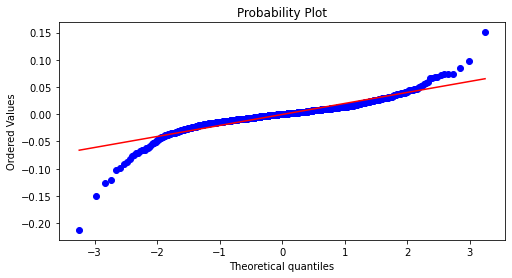

In [4]:
%matplotlib inline
import quandl
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import  probplot

quandl.ApiConfig.api_key = '54oxqVQ7BxSJHyGeFd6s'
df = quandl.get('EURONEXT/ABN.4')

daily_changes = df.pct_change(periods = 1).dropna()

figure = plt.figure(figsize= (8,4))
ax = figure.add_subplot(111)
stats.probplot(daily_changes['Last'], dist = 'norm', plot = ax)
plt.show()

# Downloading multiple time series data
In the following example, we are interested in the prices of three banking stocks - ABN Amro, Banco Santander, and Kas Bank.
The two year prices from 2016 to 2017 are stored in the df variable, with only one last prices downloaded:

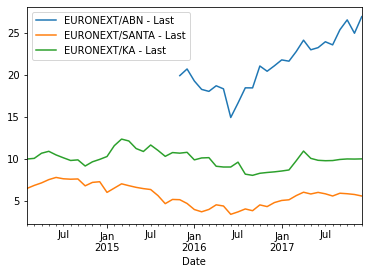

In [10]:
%matplotlib inline
import quandl
quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get(['EURONEXT/ABN.4',
                 'EURONEXT/SANTA.4',
                 'EURONEXT/KA.4'],
                collapse = 'monthly',
                startdate = '2016-01-01',
                end_date = '2017-12-31')
df.plot()

# Displaying the correlation matrix
In pandas, the corr() method computes the correlations between columns in its supplied DataFrame and outputs these
values as a matrix.

In [11]:
df.pct_change().corr()

,EURONEXT/ABN - Last,EURONEXT/SANTA - Last,EURONEXT/KA - Last
EURONEXT/ABN - Last,1.000000,0.782324,0.163721
EURONEXT/SANTA - Last,0.782324,1.000000,0.317873
EURONEXT/KA - Last,0.163721,0.317873,1.000000


From the correlation matrix output, we can infer that the ABN Amro and Banco
Santander stocks are highly correlated during the two years from 2016 to 2017 with a value of 0.782324.

By default, the corr() command uses the Pearson correlation coefficient to compute pairwise correlations.
 This is equivalent to calling corr(method = 'pearson'). Other valid values are kendall and spearman for the
 Kendall Tau and Speardman rank correlation coefficients.

# Plotting correlations
Visualizing correlations can also be achieved with the rolling() commmand.

We will use Last prices of ABN and SANTA on a daily basis from 2016 to 2017, from Quandl. The two datasets are
downloaded to the data frame df, and its rolling correlations are plotted as follows:

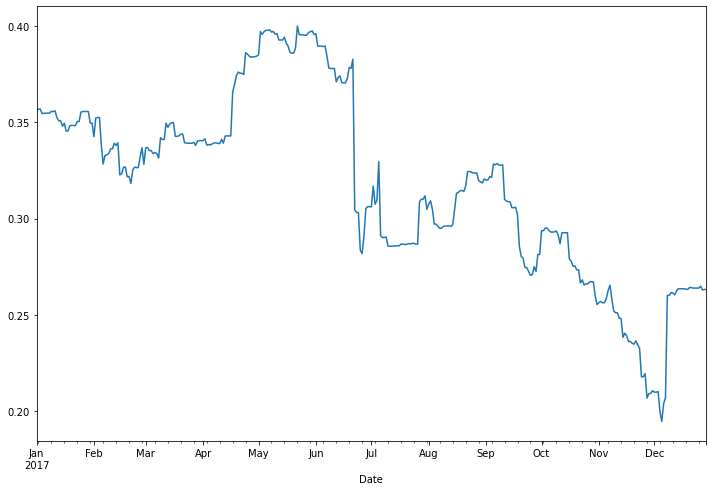

In [18]:
%matplotlib inline
import quandl
quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get(['EURONEXT/ABN.4','EURONEXT/SANTA.4'],
                start_date = '2016-01-01',
                end_date = '2017-12-31')
df_filled = df.asfreq('D', method='ffill')
daily_changes = df_filled.pct_change()
abn_returns = daily_changes['EURONEXT/ABN - Last']
santa_returns = daily_changes['EURONEXT/SANTA - Last']
window = int(len(df_filled.index)/2)
df_corrs = abn_returns\
    .rolling(window=window, min_periods=window)\
    .corr(other=santa_returns).dropna()
df_corrs.plot(figsize = (12,8))

The df_filled variable contains a DataFrame with its index re-indexed on a daily frequency basis and
missing values forward-filled in preparation for the rolling() command.
The DataFrame, daily_changes, stores the daily percentage returns, and its columns are extracted into
separate Series object as abn_returns and santa_returns, respectively. The window variable stores the average number
of days per year in the two-year dataset. This variable is supplied into the parameters of the rolling() command. The parameter
window indicates we will perform a one-year rolling correlation.
The min_periods parameter indicates that correlation will be calculated when only the full sample size
is present for calculation. In this case, there are no correlation values for the first year in the df_corrs dataset.

Finally, the plot() command displays the chart of one-year rolling correlations of daily returns throughout the year of 2017.

# Simple Moving Averages
The mean() method can be used to compute the mean of values for a given window in the rolling() command.
For example, a 5-day Simple Moving Average(SMA) is the average of prices for the last five trading days,
computed daily over a time period. We can also compute a longer term 30-day simple moving average.
These two moving averages can be used together to generate crossover signals.

In the following example, we download the daily closing prices of ABN, compute the short and long term SMAs, and visualize them on a single plot:

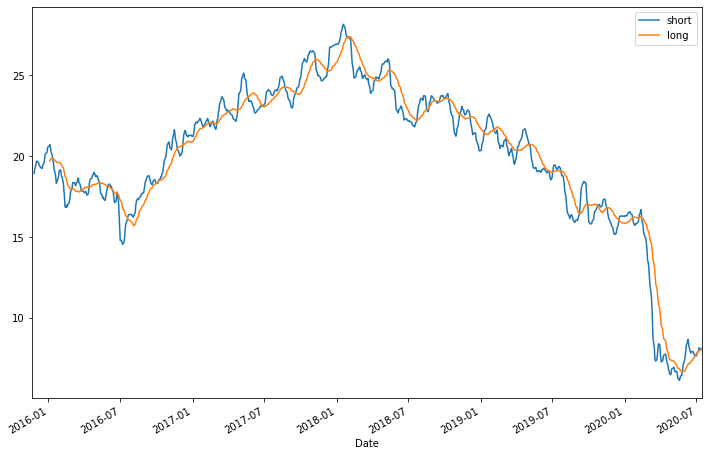

In [19]:
%matplotlib inline
import quandl
import pandas as pd

quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('EURONEXT/ABN.4')

df_filled = df.asfreq('D', method='ffill')
df_last = df['Last']

series_short = df_last.rolling(window=5, min_periods=5).mean()
series_long = df_last.rolling(window=30, min_periods=30).mean()

df_sma = pd.DataFrame(columns=['short', 'long'])
# Creates a DataFrame "df_sma" with two columns (short/long)
df_sma['short'] = series_short
df_sma['long'] = series_long
df_sma.plot(figsize = (12,8))

# Exponential moving averages
Another approach in the calculation of moving averages is the Exponential Moving Average(EMA).
Recall that the simple moving average assigns equal weight to prices within a window period.

However, in EMA, the most recent prices are assigned to a higher weight than old prices.
This weight is assigned on an exponential basis.

The ewm() method of pandas DataFrame provides exponential weighted functions. The span parameter specifies the window period
for the decay behavior. The same ABN dataset with EMA is plotted as follows:

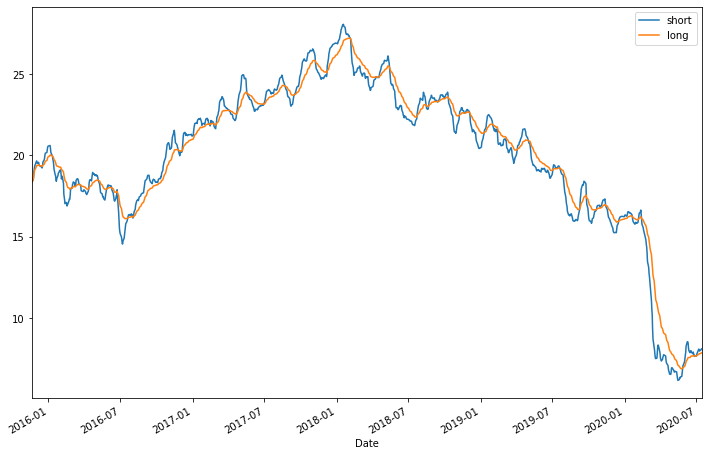

In [20]:
%matplotlib inline
import quandl
import pandas as pd

quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('EURONEXT/ABN.4')

df_filled = df.asfreq('D', method='ffill')
df_last = df['Last']

series_short = df_last.ewm(span=5).mean()
series_long = df_last.ewm(span=30).mean()

df_sma = pd.DataFrame(columns=['short', 'long'])
df_sma['short'] = series_short
df_sma['long'] = series_long
df_sma.plot(figsize = (12,8))

The chart patterns for the SMA and EMA are largely the same. Since EMAs place a higher weighting
on recent data than on older data. they are more reactive to price changes than SMAs are.


# Summary
With a Quandl account, we an easily obtain high-quality time series datasets.
Datasets directly download into a pandas DataFrame object that allows us to perform financial analytics, such as
plotting daily percentage returns, histograms, Q-Q plots, correlations, simple moving averages, and exponential moving averages.